In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwpy==1.0.1'

     |████████████████████████████████| 1.4 MB 6.9 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 3.2 MB 31.7 MB/s 


In [ ]:
from gwosc.datasets import find_datasets
events = find_datasets(type="event")
print(events)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200214_224526-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 

In [ ]:
print(find_datasets(type="event", detector="V1"))
print(find_datasets(type="event", detector="H1"))
print(find_datasets(type="event", detector="L1"))

['190924_232654-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 'GW190521-v2', 'GW190521-v3', 'GW190602_175927-v1', 'GW190620_030421-v1', 'GW190630_185205-v1', 'GW190701_203306-v1', 'GW190706_222641-v1', 'GW190708_232457-v1', 'GW190720_000836-v1', 'GW190727_060333-v1', 'GW190728_064510-v1', 'GW190803_022701-v1', 'GW190814-v1', 'GW190814-v2', 'GW190828_063405-v1', 'GW190828_065509-v1', 'GW190910_112807-v1', 'GW190915_235702-v1', 'GW190924_021846-v1', 'GW190929_012149-v1', 'GW200105-v1', 'GW200115-v1']
['151008-v1', '151012.2-v1', '151116-v1', '161202-v1',

In [ ]:
from gwosc.datasets import event_gps
gps = event_gps('GW150914-v3')
print(gps)

1126259462.4


In [ ]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1126259457, 1126259467)


In [ ]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(hdata)

Fetched 1 URLs from www.gw-openscience.org for [1126259457 .. 1126259467))
Reading data... [Done]
TimeSeries([-3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,  1.52206625e-19,  1.58897479e-19,
             1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


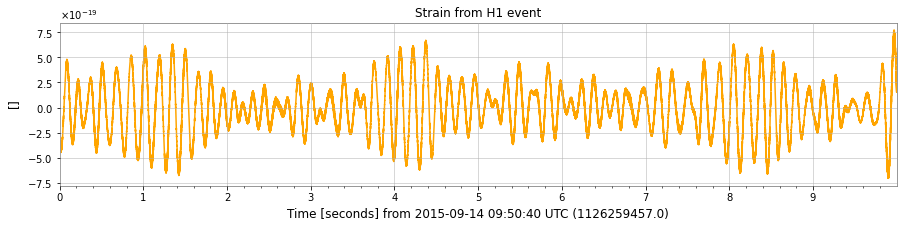

In [ ]:
%matplotlib inline
plot = hdata.plot(figsize=(15, 3), title='Strain from H1 event', color='orange');
plt = plot
#plt.savefig('1.png', bbox_inches='tight', dpi=300)

In [ ]:
fft = hdata.fft()
print(fft)

FrequencySeries([ 2.83592039e-21+0.00000000e+00j,
                 -1.72531983e-20+9.11145513e-21j,
                  1.55498401e-20-6.38067019e-21j, ...,
                 -1.14703105e-23-7.91379036e-26j,
                 -1.15218693e-23+8.39374010e-28j,
                 -1.15216273e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1126259457.0,
                name: Strain,
                channel: None)


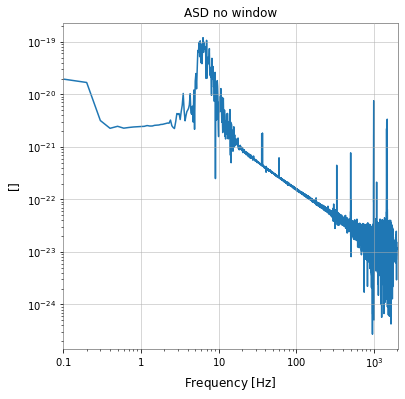

In [ ]:
plot = fft.abs().plot(xscale="log", yscale="log",figsize=(6,6), title='ASD no window')
plot.show(warn=False)
plt = plot
#plt.savefig('ASD no window.png', dpi=300)

In [ ]:
from scipy.signal import get_window
window = get_window('hann', hdata.size)
hwin = hdata * window

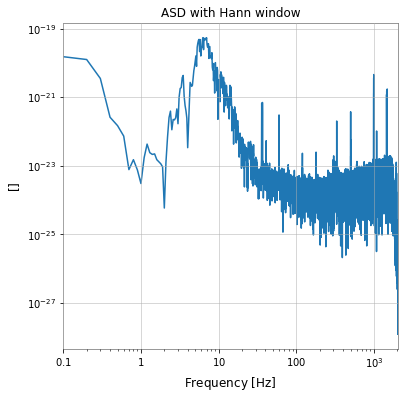

In [ ]:
fftamp = hwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log", figsize=(6,6), title='ASD with Hann window')
plot.show(warn=False)
plt = plot
#plt.savefig('ASD Hann.png', dpi=300)

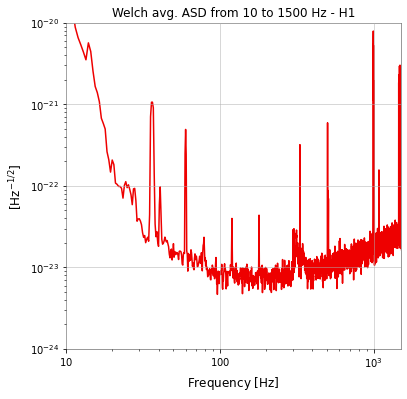

In [ ]:
asd_h = hdata.asd(fftlength=2, window='hann', method="welch")
plot = asd_h.plot(title='Welch avg. ASD from 10 to 1500 Hz - H1', figsize=(6,6), color='gwpy:ligo-Hanford')
plt = plot
plt.savefig('ASD welch.png', dpi=300)
ax = plot.gca()  
ax.set_xlim(10, 1500)
ax.set_ylim(1e-24, 1e-20);

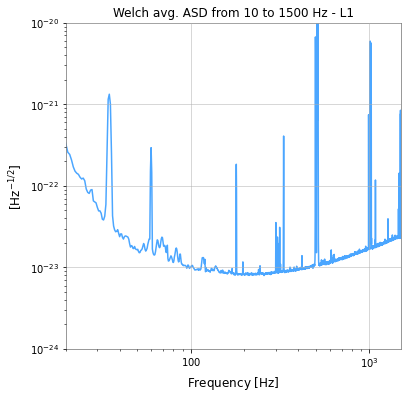

In [ ]:
ldata2 = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
lasd2 = ldata2.asd(fftlength=2, window='hann', method="welch")
plot = lasd2.plot(title='Welch avg. ASD from 10 to 1500 Hz - L1', figsize=(6,6), color='gwpy:ligo-Livingston')
ax = plot.gca()
ax.set_xlim(20, 1500)
ax.set_ylim(1e-24, 1e-20)
plot.show(warn=False)

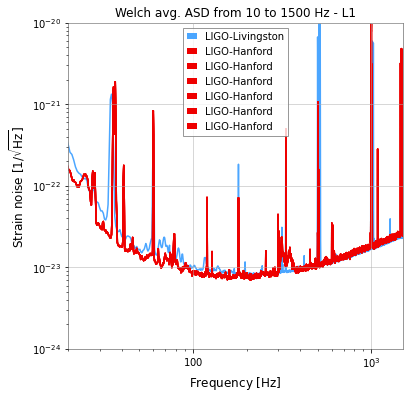

In [ ]:
# get Hanford data
hdata2 = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")

# get Virgo data
# vdata2 = TimeSeries.fetch_open_data('V1', int(gps)-512, int(gps)+512, cache=True)
# vasd2 = vdata2.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(hasd2, label='LIGO-Hanford', color='gwpy:ligo-hanford')
# ax.plot(vasd2, label='Virgo', color='gwpy:virgo')

plt = ax.plot(hasd2, label='LIGO-Hanford', color='gwpy:ligo-hanford')
# update the Livingston line to use standard colour, and have a label
lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

In [ ]:
%matplotlib inline
import gwpy

In [ ]:
from gwpy.timeseries import TimeSeries

In [ ]:
gps_ev = event_gps('GW150914-v3')
print(gps_ev)

1126259462.4


In [ ]:
seg_hlen = 128
h1_data = TimeSeries.fetch_open_data('H1', gps_ev-seg_hlen, gps_ev+seg_hlen, verbose=True)  # cache=True stores file on your computer.
print(h1_data)

Fetched 1 URLs from www.gw-openscience.org for [1126259334 .. 1126259591))
Reading data... [Done]
TimeSeries([-1.30753755e-19, -8.51768108e-20, -5.89739382e-20,
            ...,  2.04756029e-19,  1.50512806e-19,
             1.42109568e-19]
           unit: dimensionless,
           t0: 1126259334.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


/usr/local/lib/python3.7/dist-packages/gwpy/types/series.py:926: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  % type(self).__name__)


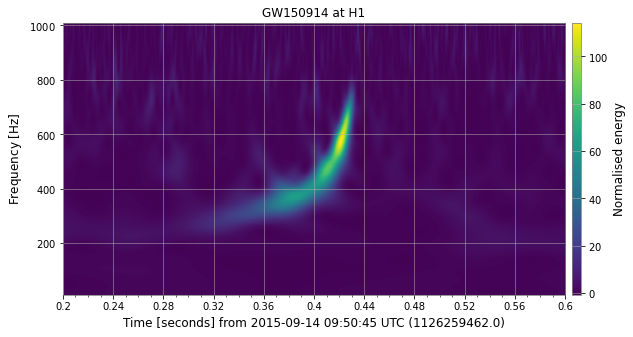

In [ ]:
h1_q = h1_data.q_transform(frange=(10,1000),outseg=(gps_ev-0.2,gps_ev+0.2),logf=True)
#outseg=(gps_ev-0.25,gps_ev+0.25), 
plot = h1_q.plot(title='GW150914 at H1', figsize=(9,5))
plot.colorbar(label="Normalised energy");
plt = plot
plt.savefig('chirp H1.png', dpi=300, bbox_inches='tight')

In [ ]:
seg_hlen = 128
L1_data = TimeSeries.fetch_open_data('L1', gps_ev-seg_hlen, gps_ev+seg_hlen, verbose=True)  # cache=True stores file on your computer.
print(L1_data)

Fetched 1 URLs from www.gw-openscience.org for [1126259334 .. 1126259591))
Reading data... [Done]
TimeSeries([-1.53041648e-18, -1.55394821e-18, -1.56156552e-18,
            ..., -1.01924798e-18, -1.00054136e-18,
            -9.76161252e-19]
           unit: dimensionless,
           t0: 1126259334.3999023 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


/usr/local/lib/python3.7/dist-packages/gwpy/types/series.py:926: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  % type(self).__name__)


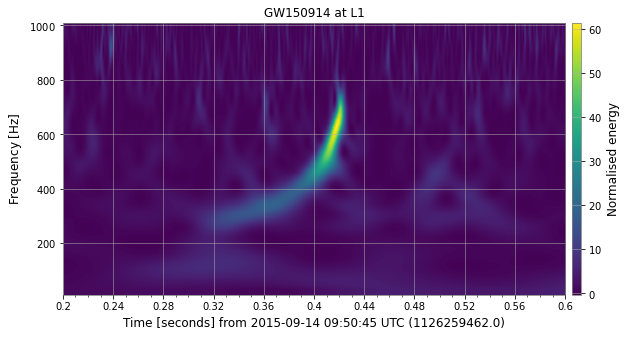

In [ ]:
l1_q = L1_data.q_transform(frange=(10,1000),outseg=(gps_ev-0.2,gps_ev+0.2),logf=True)
#outseg=(gps_ev-0.25,gps_ev+0.25), 
plot = l1_q.plot(title='GW150914 at L1', figsize=(9,5))
plot.colorbar(label="Normalised energy");
plt = plot
plt.savefig('chirp L1.png', dpi=300, bbox_inches='tight')

Generating Waveform

In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'PyCBC==1.15.3' 'lalsuite==6.66'

     |████████████████████████████████| 3.1 MB 14.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 28.5 MB 64 kB/s 
     |████████████████████████████████| 1.0 MB 42.4 MB/s 
     |████████████████████████████████| 1.6 MB 46.8 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 


In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

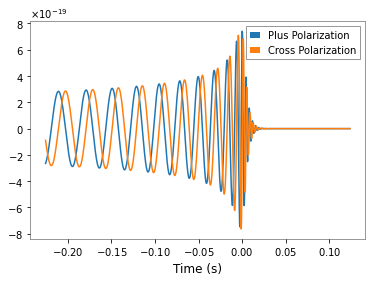

In [ ]:
# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=36,
                         mass2=29,
                         delta_t=1.0/4096,
                         f_lower=30)
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
plt = pylab
plt.savefig('h+hx.png',dpi=300)
pylab.show()



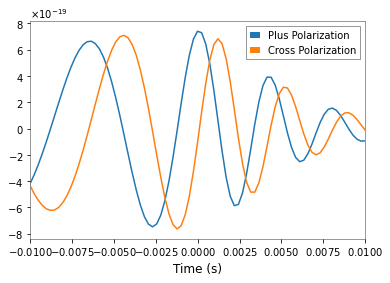

In [ ]:
# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
plt = pylab
plt.savefig('h+hx zoom.png',dpi=300)
pylab.show()


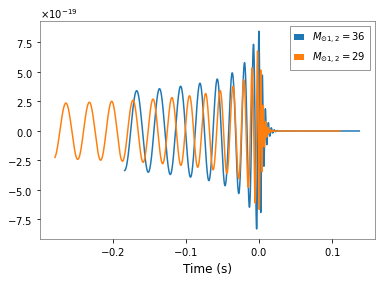

In [ ]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
for m in [36,29]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
plt = pylab
plt.savefig('h+hx masses.png',dpi=300)
pylab.show()

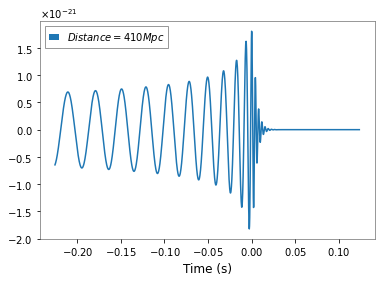

In [ ]:
for d in [410]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=36,
                         mass2=29,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
plt = pylab
plt.savefig('Luminosity Distance.png',dpi=300)
pylab.show()

Matched Filtering

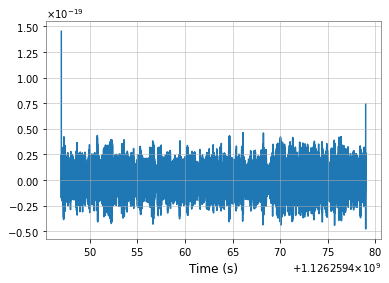

In [ ]:
%matplotlib inline

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

# As an example we use the GW150914 data
merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.savefig('conditioned data.png', dpi=300, bbox_inches='tight')
pylab.show()

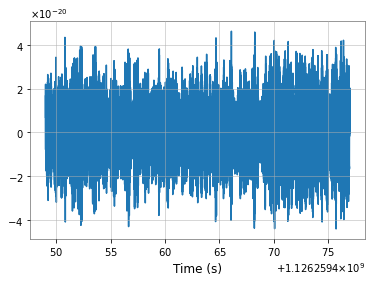

In [ ]:
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.savefig('cropped data.png', dpi=300, bbox_inches='tight')
pylab.show()

In [ ]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, 4 * conditioned.sample_rate,
                                  low_frequency_cutoff=15)

Text(0, 0.5, 'Strain')

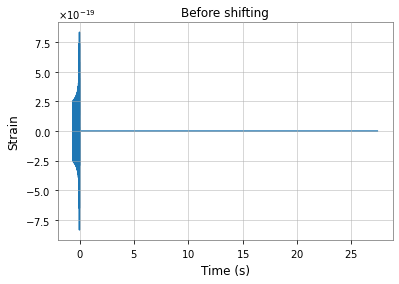

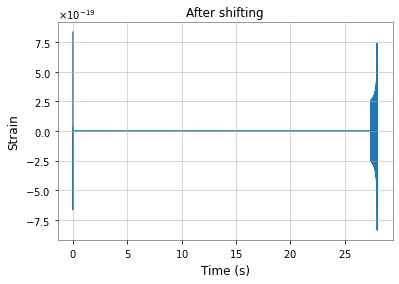

In [ ]:
from pycbc.waveform import get_td_waveform
# In this case we "know" what the signal parameters are. In a search
# we would grid over the parameters and calculate the SNR time series
# for each one

# We'll assume equal masses, and non-rotating black holes which is within the posterior probability
# of GW150914. 
m = 36 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# We will resize the vector to match our data
hp.resize(len(conditioned))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the 
# first bin of the data.

# The cyclic_time_shift method shifts the timeseries by a given amount of time.
# It treats the data as if it were on a ring so points shifted off the end
# of the series reappear at the start. Note that time stamps are *not* in
# general affected (as the start time of the full array is shifted),
# but the index of each point in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to 
# shift the merger into position
pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

Text(16.455078125, 0.5, 'Strain')

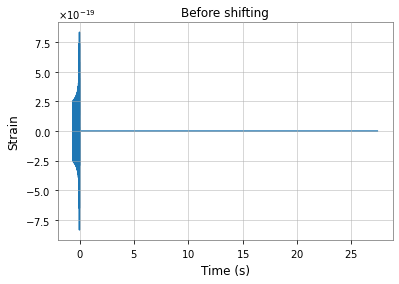

In [ ]:
pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.savefig('before shifting.png', dpi=300, bbox_inches='tight')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

Text(16.455078125, 0.5, 'Strain')

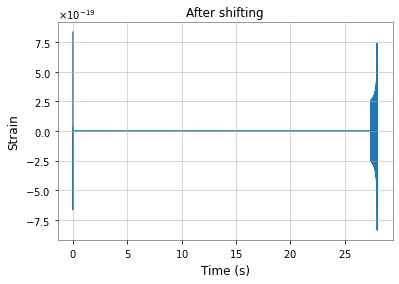

In [ ]:
pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.savefig('after shifting.png', dpi=300, bbox_inches='tight')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

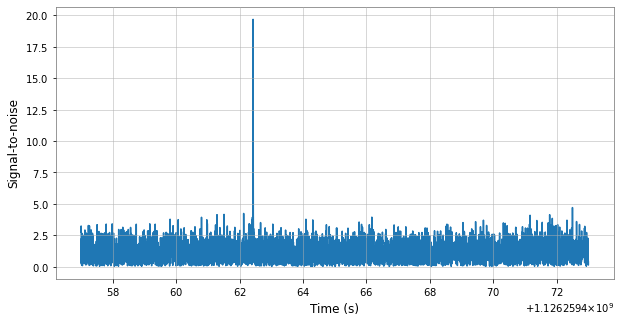

We found a signal at 1126259462.4248047s with SNR 19.67708901314592


In [ ]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why are we taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 5])
pylab.plot(snr.sample_times, abs(snr))
pylab.savefig('Signal SNR.png', dpi=300, bbox_inches='tight')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

In [ ]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

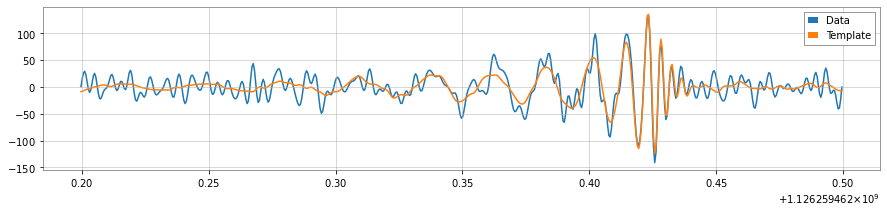

In [ ]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()
white_template = (aligned.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.savefig('Whiten data.png', dpi=300, bbox_inches='tight')
pylab.show()

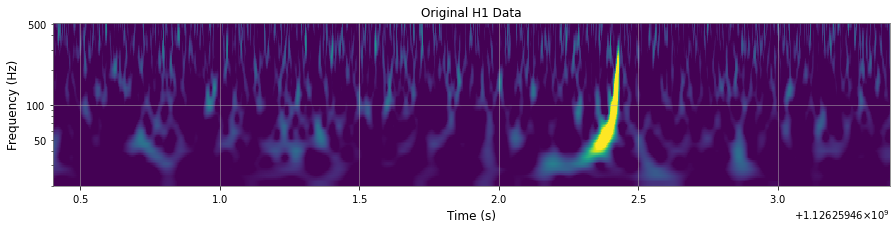

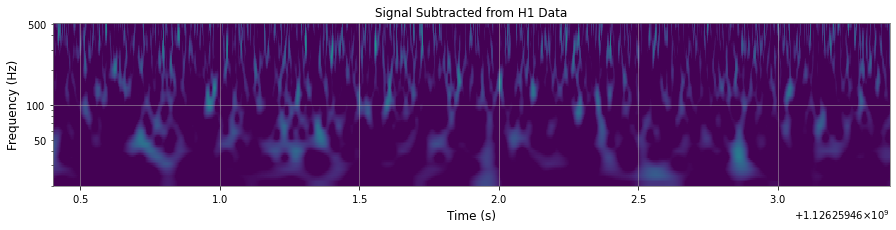

In [ ]:
subtracted = conditioned - aligned

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()

Signal Consistency Check

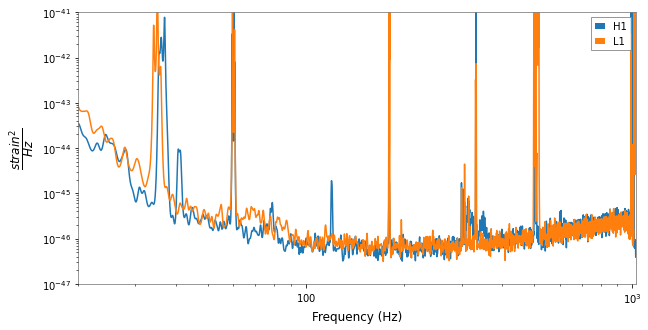

In [ ]:
%matplotlib inline

import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation

m = Merger("GW150914")

ifos = ['H1', 'L1']
data = {}
psd = {}

pylab.figure(figsize=[10, 5])

for ifo in ifos:
    # Read in and precondition the data
    ts = m.strain(ifo).highpass_fir(15, 512)
    data[ifo] = resample_to_delta_t(ts, 1.0/2048).crop(2, 2)

    # Estimate the power spectral density of the data
    # This chooses to use 2s samples in the PSD estimate.
    # One should note that the tradeoff in segment length is that
    # resolving narrow lines becomes more difficult.
    p = data[ifo].psd(2)
    p = interpolate(p, data[ifo].delta_f)
    p = inverse_spectrum_truncation(p, 2 * data[ifo].sample_rate, low_frequency_cutoff=15.0)
    psd[ifo] = p
    
    pylab.plot(psd[ifo].sample_frequencies, psd[ifo], label=ifo)

pylab.yscale('log')
pylab.xscale('log')
pylab.ylim(1e-47, 1e-41)
pylab.xlim(20, 1024)
pylab.ylabel('$\dfrac{strain^2}{Hz}$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.legend()
pylab.savefig('PSD H1 L1.png', dpi=300, bbox_inches='tight')
pylab.show()

In [ ]:
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter

# Calculate the component mass of each black hole in the detector frame
cmass = (m.median1d("mass1")+m.median1d("mass2")) / 2      # This is in the source frame
cmass *= (1 + m.median1d("redshift")) # apply redshift to get to the detector frame

# This is a frequency domain waveform generator. It has a very similar syntax to the time domain
# waveform function used in prior tutorials. This function returns both a plus and a cross
# polarization waveform, but we will just use the plus polarization in building our template
# as these are only different by a phase offset in this specific case.
hp, _ = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=cmass, mass2=cmass,
                         f_lower=20.0, delta_f=data[ifo].delta_f)
hp.resize(len(psd[ifo]))

# For each observatory use this template to calculate the SNR time series
snr = {}
for ifo in ifos:
    snr[ifo] = matched_filter(hp, data[ifo], psd=psd[ifo], low_frequency_cutoff=20)
    snr[ifo] = snr[ifo].crop(5, 4)

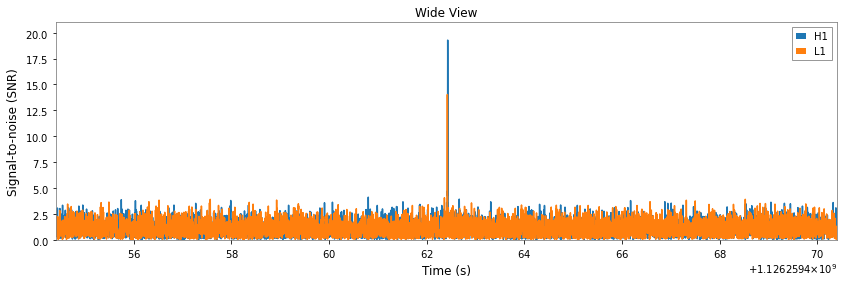

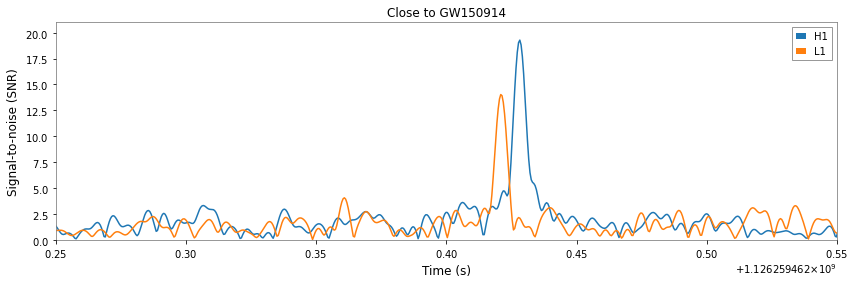

In [ ]:
# Show a couple sizes
for w, title in [(8, 'Wide View'), (.15, 'Close to GW150914')]:
    pylab.figure(figsize=[14, 4])
    for ifo in ifos:
        pylab.plot(snr[ifo].sample_times, abs(snr[ifo]), label=ifo)
    pylab.legend()
    pylab.title(title)
    pylab.grid()
    pylab.xlim(m.time - w, m.time + w)
    pylab.ylim(0, 21)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Signal-to-noise (SNR)')
    pylab.savefig('wide and close view.png', dpi=300, bbox_inches='tight')
    pylab.show()

In [ ]:
# WARNING!! If you are having problems with this code, replace the import with
#from pycbc_chisq import power_chisq
from pycbc.vetoes import power_chisq

chisq = {}
for ifo in ifos:
    # The number of bins to use. In principle, this choice is arbitrary. In practice,
    # this is empirically tuned.
    nbins = 26
    chisq[ifo] = power_chisq(hp, data[ifo], nbins, psd[ifo], low_frequency_cutoff=20.0)
    chisq[ifo] = chisq[ifo].crop(5, 4)
    
    dof = nbins * 2 - 2
    chisq[ifo] /= dof

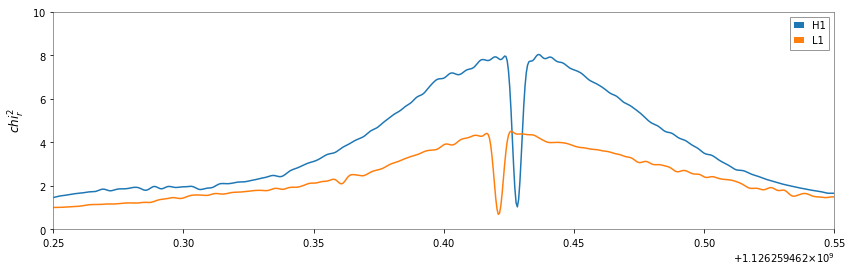

In [ ]:
pylab.figure(figsize=[14, 4])

for ifo in ifos:
    pylab.plot(chisq[ifo].sample_times, chisq[ifo], label=ifo)
    
pylab.legend()
pylab.grid()
pylab.xlim(m.time -0.15, m.time + 0.15)
pylab.ylim(0, 10)
pylab.ylabel('$chi^2_r$')
pylab.savefig('chi^2.png', dpi=300, bbox_inches='tight')
pylab.show()

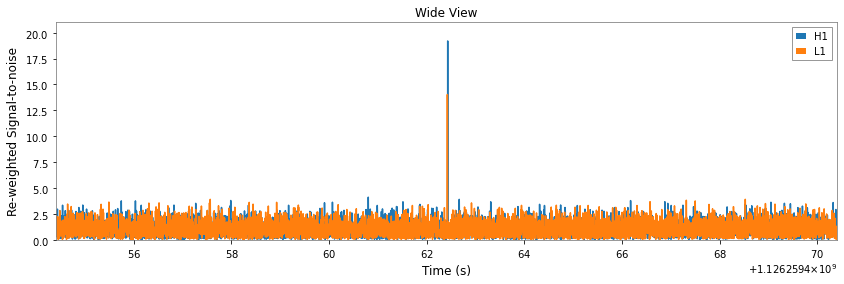

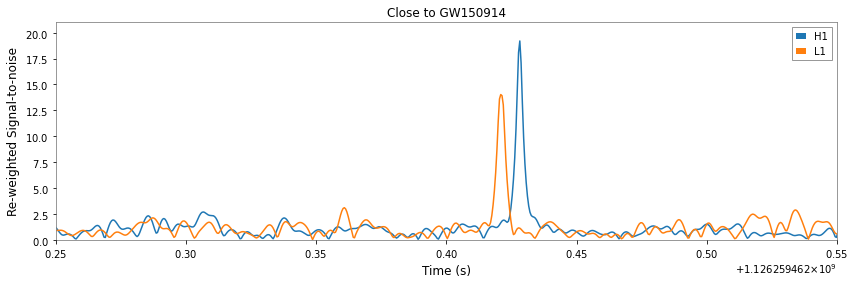

In [ ]:
from pycbc.events.ranking import newsnr

# The rho-hat term above is named "newsnr" here
nsnr = {ifo:newsnr(abs(snr[ifo]), chisq[ifo]) for ifo in ifos}

# Show a couple sizes
for w, title in [(8, 'Wide View'), (.15, 'Close to GW150914')]:
    pylab.figure(figsize=[14, 4])
    for ifo in ifos:
        pylab.plot(snr[ifo].sample_times, nsnr[ifo], label=ifo)

    pylab.legend()
    pylab.title(title)
    pylab.grid()
    pylab.xlim(m.time - w, m.time + w)
    pylab.ylim(0, 21)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Re-weighted Signal-to-noise')
    pylab.show()

Sky Localization

In [ ]:
# -- Use for Google Colab
! pip install -q 'healpy==1.13.0' 'astropy==4.0'

     |████████████████████████████████| 11.8 MB 15.4 MB/s 
     |████████████████████████████████| 6.5 MB 45.5 MB/s 


In [ ]:
from IPython.display import display, Math, Latex
from __future__ import print_function
%matplotlib inline

In [ ]:
from astropy.utils.data import download_file
url = ('https://dcc.ligo.org/public/0157/P1800381/002/GW150914_skymap.fits.gz')
gw150914_skymap = download_file(url, cache=True)

In [ ]:
import healpy as hp
prob, header = hp.read_map(gw150914_skymap, h=True)

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [ ]:
header

[('XTENSION', 'BINTABLE'),
 ('BITPIX', 8),
 ('NAXIS', 2),
 ('NAXIS1', 32),
 ('NAXIS2', 3145728),
 ('PCOUNT', 0),
 ('GCOUNT', 1),
 ('TFIELDS', 4),
 ('TTYPE1', 'PROB'),
 ('TFORM1', 'D'),
 ('TUNIT1', 'pix-1'),
 ('TTYPE2', 'DISTMU'),
 ('TFORM2', 'D'),
 ('TUNIT2', 'Mpc'),
 ('TTYPE3', 'DISTSIGMA'),
 ('TFORM3', 'D'),
 ('TUNIT3', 'Mpc'),
 ('TTYPE4', 'DISTNORM'),
 ('TFORM4', 'D'),
 ('TUNIT4', 'Mpc-2'),
 ('PIXTYPE', 'HEALPIX'),
 ('ORDERING', 'NESTED'),
 ('COORDSYS', 'C'),
 ('NSIDE', 512),
 ('INDXSCHM', 'IMPLICIT'),
 ('OBJECT', 'GW150914'),
 ('DATE-OBS', '2015-09-14T09:50:45.413942'),
 ('MJD-OBS', 57279.41024784678),
 ('DATE', '2018-12-07T18:27:48.395310'),
 ('CREATOR', 'ligo-skymap-from-samples'),
 ('ORIGIN', 'LIGO/Virgo'),
 ('DISTMEAN', 429.3026047699972),
 ('DISTSTD', 96.86798426642913),
 ('VCSVERS', 'ligo.skymap 0.0.16'),
 ('VCSREV', 'fc21f49fb3ccd8df231a8d739e4c1ce5871f6870'),
 ('DATE-BLD', '2018-09-11T15:39:33'),
 ('HISTORY', ''),
 ('HISTORY', 'Generated by running the following script:'),


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


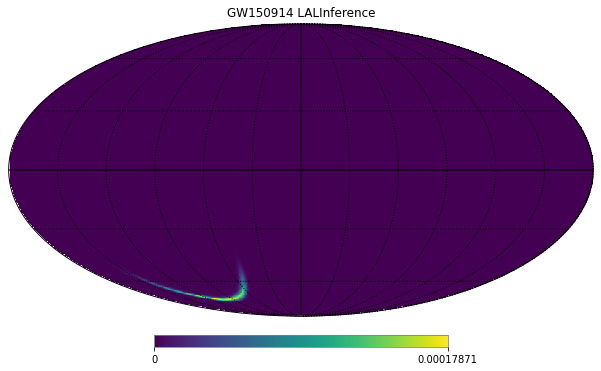

In [ ]:
hp.mollview(prob, title='GW150914 LALInference',fig='lalinference')
hp.graticule()

Parameter estimation for compact object mergers -- Using and interpreting posterior samples





In [ ]:
# -- Use the following line for google colab
! pip install -q 'corner==2.0.1' 'bilby==1.0.4' 'astropy==4.0.3'

     |████████████████████████████████| 11.6 MB 180 kB/s 
     |████████████████████████████████| 10.2 MB 49.1 MB/s 
     |████████████████████████████████| 87 kB 5.1 MB/s 


In [ ]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import corner

In [ ]:
label = 'GW150914'

# if you do not have wget installed, simply download manually 
# https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5 
# from your browser
! wget https://dcc.ligo.org/LIGO-P1800370/public/{label}_GWTC-1.hdf5

--2021-08-11 12:07:42--  https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dcc.ligo.org/public/0157/P1800370/005/GW150914_GWTC-1.hdf5 [following]
--2021-08-11 12:07:44--  https://dcc.ligo.org/public/0157/P1800370/005/GW150914_GWTC-1.hdf5
Reusing existing connection to dcc.ligo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 7026464 (6.7M)
Saving to: ‘GW150914_GWTC-1.hdf5’

GW150914_GWTC-1.hdf 100%[===================>]   6.70M  5.04MB/s    in 1.3s    

2021-08-11 12:07:45 (5.04 MB/s) - ‘GW150914_GWTC-1.hdf5’ saved [7026464/7026464]



In [ ]:
posterior_file = './'+label+'_GWTC-1.hdf5'
posterior = h5py.File(posterior_file, 'r')

In [ ]:
print('This file contains four datasets: ',posterior.keys())

This file contains four datasets:  <KeysViewHDF5 ['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']>


In [ ]:
print(posterior['Overall_posterior'].dtype.names)

('costheta_jn', 'luminosity_distance_Mpc', 'right_ascension', 'declination', 'm1_detector_frame_Msun', 'm2_detector_frame_Msun', 'spin1', 'spin2', 'costilt1', 'costilt2')


In [ ]:
samples=pd.DataFrame.from_records(np.array(posterior['Overall_posterior']))

In [ ]:
samples

,costheta_jn,luminosity_distance_Mpc,right_ascension,declination,m1_detector_frame_Msun,m2_detector_frame_Msun,spin1,spin2,costilt1,costilt2
0,-0.976633,517.176717,1.456176,-1.257815,39.037380,37.044563,0.417147,0.867740,-0.280624,0.403853
1,-0.700404,401.626864,2.658802,-0.874661,34.620096,34.184416,0.125709,0.260679,-0.757349,-0.312285
2,-0.840752,369.579071,1.106548,-1.136396,37.894343,33.970520,0.581047,0.926893,0.649781,-0.510843
3,-0.583657,386.935268,2.077180,-1.246351,36.412973,35.684463,0.235808,0.094391,0.116578,-0.720505
4,-0.928271,345.104345,0.993604,-1.069243,39.477251,31.645008,0.511521,0.868009,-0.438237,0.269333
...,...,...,...,...,...,...,...,...,...,...
8345,-0.691637,306.985025,1.485646,-1.269228,37.561962,33.355792,0.484003,0.627191,0.194507,-0.408345
8346,-0.834615,462.649414,2.065362,-1.265618,37.824298,36.674075,0.589654,0.650758,-0.737792,0.875384
8347,-0.911463,448.930876,1.536913,-1.257956,38.063291,35.757913,0.708407,0.714805,0.852085,-0.797475
8348,-0.856914,561.020036,2.367289,-1.211824,44.884396,31.592433,0.389284,0.521304,-0.251461,0.830526


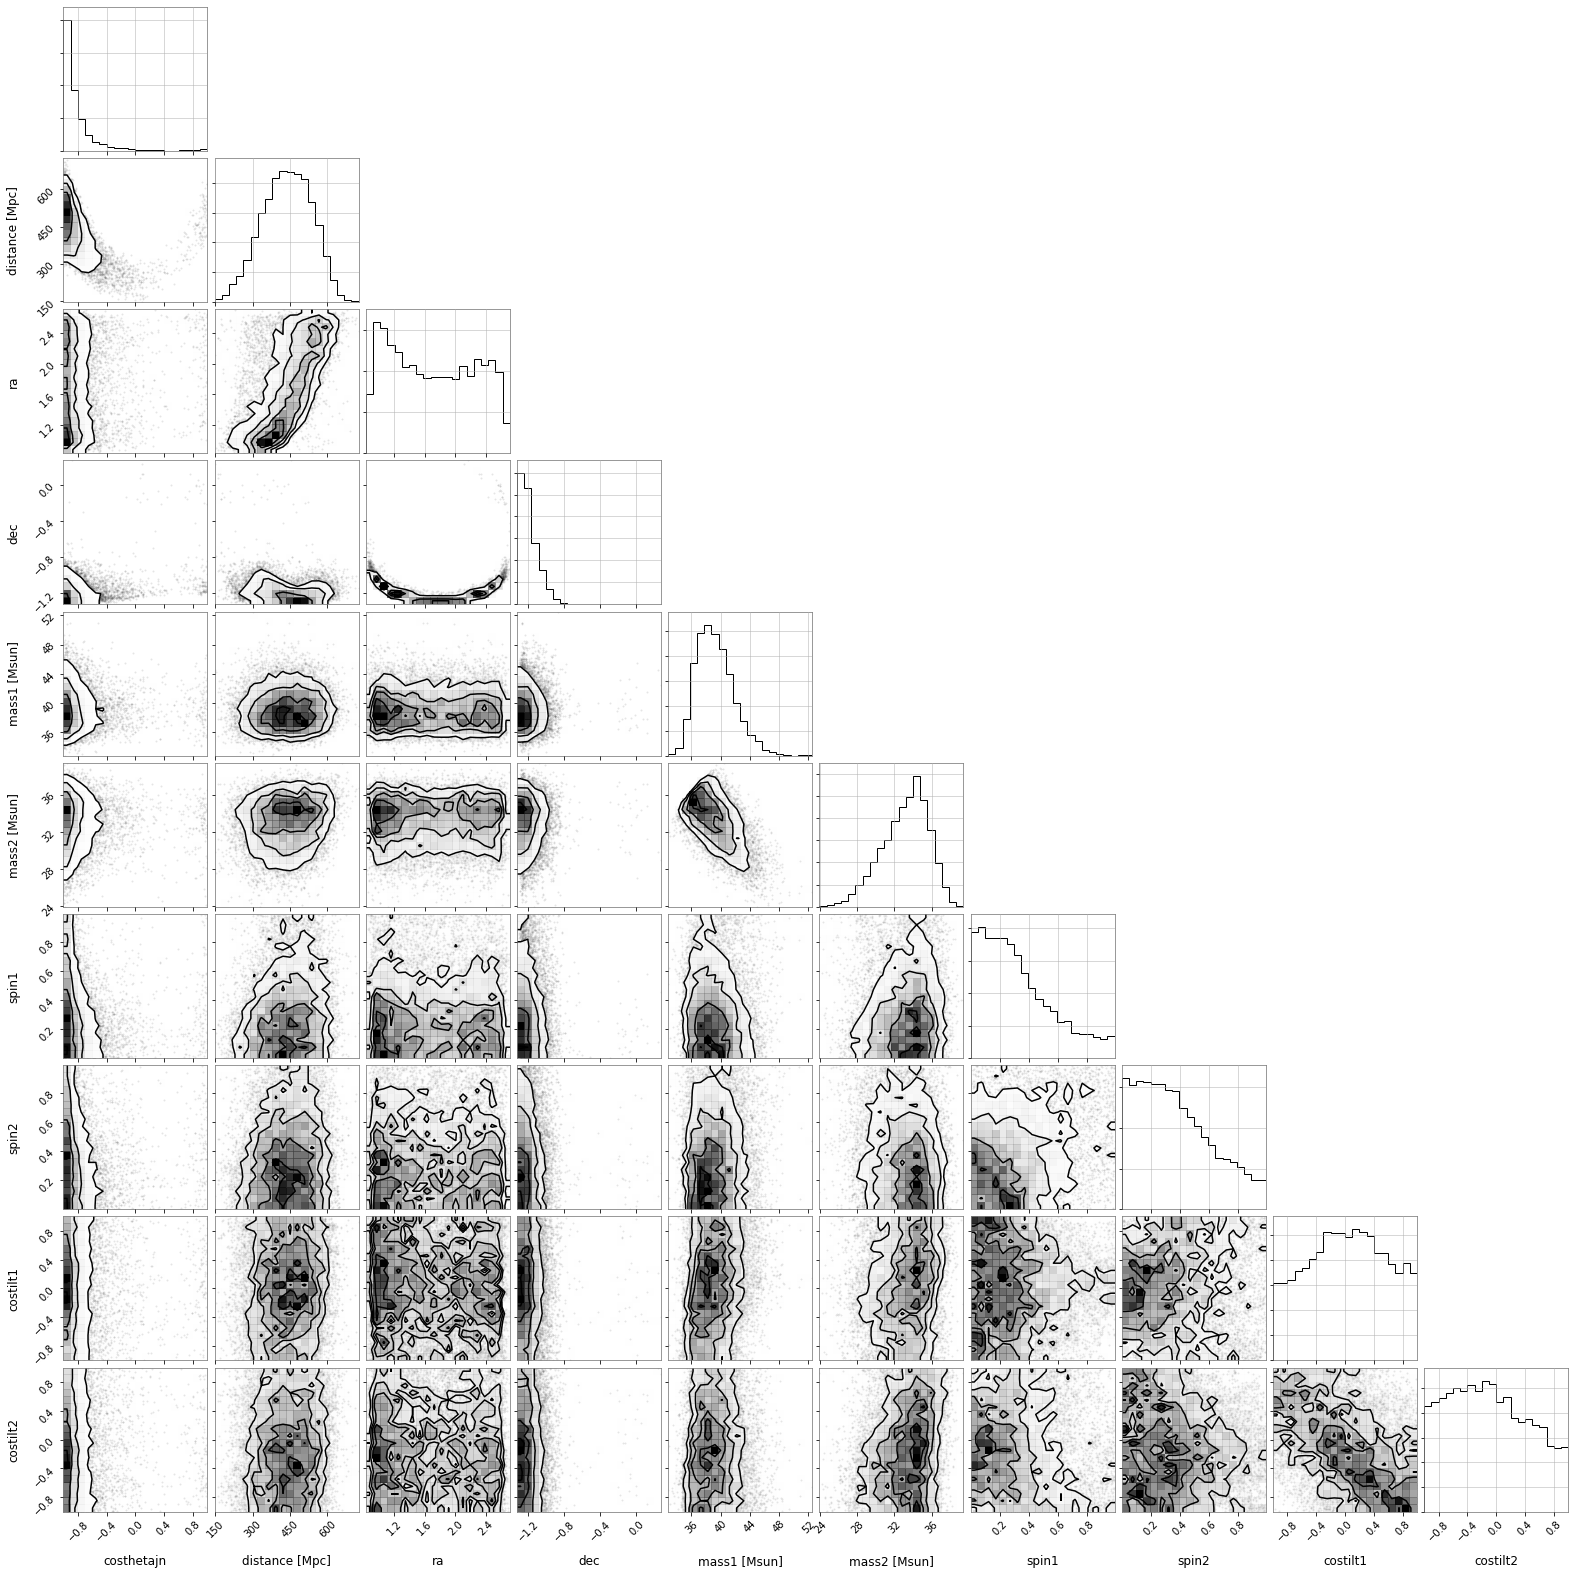

In [ ]:
corner.corner(samples,labels=['costhetajn',
                                'distance [Mpc]',
                                'ra',
                                'dec',
                                'mass1 [Msun]',
                                'mass2 [Msun]',
                                'spin1',
                                'spin2',
                                'costilt1',
                                'costilt2']);

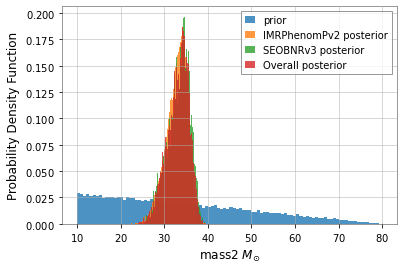

In [ ]:
plt.hist(posterior['prior']['m2_detector_frame_Msun'], bins = 100, label='prior', alpha=0.8, density=True)
plt.hist(posterior['IMRPhenomPv2_posterior']['m2_detector_frame_Msun'], bins = 100, label='IMRPhenomPv2 posterior', alpha=0.8, density=True)
plt.hist(posterior['SEOBNRv3_posterior']['m2_detector_frame_Msun'], bins = 100, label='SEOBNRv3 posterior', alpha=0.8, density=True)
plt.hist(posterior['Overall_posterior']['m2_detector_frame_Msun'], bins = 100, label='Overall posterior', alpha=0.8, density=True)
plt.xlabel(r'mass2 $M_{\odot}$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

In [ ]:
import astropy.units as u
from astropy.cosmology import Planck15, z_at_value

In [ ]:
z = np.array([z_at_value(Planck15.luminosity_distance, dist * u.Mpc) for dist in samples['luminosity_distance_Mpc']])

In [ ]:
samples['m1_source_frame_Msun']=samples['m1_detector_frame_Msun']/(1.0+z)
samples['m2_source_frame_Msun']=samples['m2_detector_frame_Msun']/(1.0+z)
samples['redshift'] = z

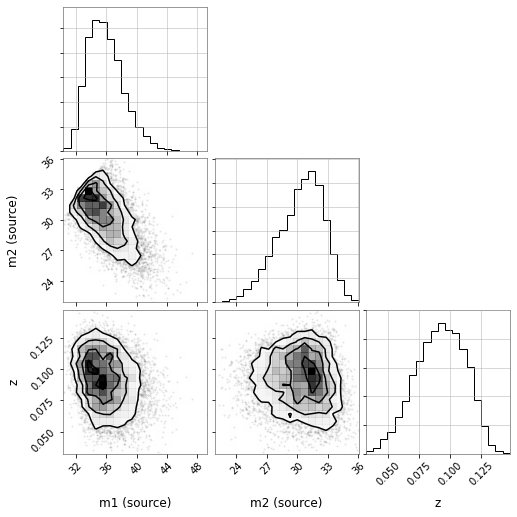

In [ ]:
corner.corner(samples[['m1_source_frame_Msun','m2_source_frame_Msun','redshift']],labels=['m1 (source)',
                                                                                          'm2 (source)',
                                                                                          'z']);

In [ ]:
import bilby
# calculate the detector frame chirp mass
mchirp = ((samples['m1_detector_frame_Msun'] * samples['m2_detector_frame_Msun'])**(3./5))/\
         (samples['m1_detector_frame_Msun'] + samples['m2_detector_frame_Msun'])**(1./5)
# initialize a SampleSummary object to describe the chirp mass posterior samples
chirp_mass_samples_summary = bilby.core.utils.SamplesSummary(samples=mchirp, average='median')
print('The median chirp mass = {} Msun'.format(chirp_mass_samples_summary.median))
print('The 90% confidence interval for the chirp mass is {} - {} Msun'.format(chirp_mass_samples_summary.lower_absolute_credible_interval,
                                                                        chirp_mass_samples_summary.upper_absolute_credible_interval))

The median chirp mass = 31.23055308109465 Msun
The 90% confidence interval for the chirp mass is 29.655877108464615 - 32.97324559242388 Msun


Parameter estimation on GW150914 using open data.

In [ ]:
# -- Use the following line in Google Colab
! pip install -q 'lalsuite==6.82' 'bilby==1.0.4' 'gwpy==2.0.2'

     |████████████████████████████████| 27.3 MB 71 kB/s 
     |████████████████████████████████| 11.6 MB 185 kB/s 
     |████████████████████████████████| 1.4 MB 34.8 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 30.4 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.2 MB 33.5 MB/s 


In [ ]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

import bilby
from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

In [ ]:
print(bilby.__version__)

1.0.4: release


In [ ]:
time_of_event = 1126259462.4

In [ ]:
H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [ ]:
# Definite times in relation to the trigger time (time_of_event), duration and post_trigger_duration
post_trigger_duration = 2
duration = 4
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

L1_analysis_data = TimeSeries.fetch_open_data(
    "L1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

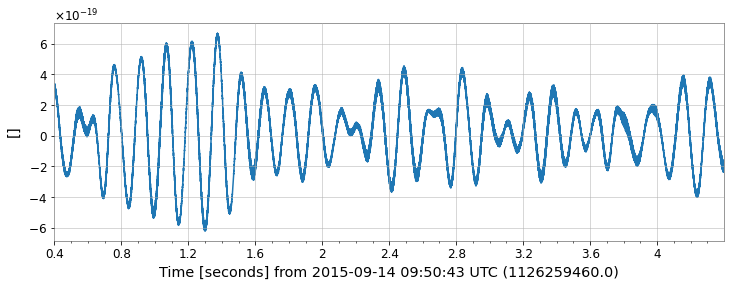

In [ ]:
H1_analysis_data.plot()
plt.show()

In [ ]:
H1.set_strain_data_from_gwpy_timeseries(H1_analysis_data)
L1.set_strain_data_from_gwpy_timeseries(L1_analysis_data)

In [ ]:
psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

L1_psd_data = TimeSeries.fetch_open_data(
    "L1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

In [ ]:
psd_alpha = 2 * H1.strain_data.roll_off / duration
H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd = L1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [ ]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)
L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=L1_psd.value)

12:16 bilby INFO    : Generating frequency domain strain from given time domain strain.
12:16 bilby INFO    : Applying a tukey window with alpha=0.1, roll off=0.2


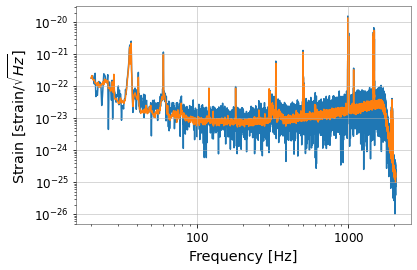

In [ ]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [ ]:
H1.maximum_frequency = 1024
L1.maximum_frequency = 1024

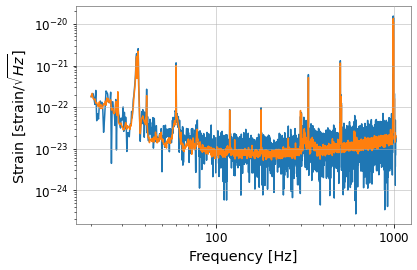

In [ ]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [ ]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694 # accumulated gravitational waves
prior['psi'] =  0.532268 # orientation phase
prior['luminosity_distance'] = 412.066

In [ ]:
# First, put our "data" created above into a list of intererometers (the order is arbitrary)
interferometers = [H1, L1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='IMRPhenomPv2', reference_frequency=100., catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=False)

12:16 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [ ]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='short', label="GW150914",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sample="unif", nlive=500, dlogz=3  # <- Arguments are used to make things fast - not recommended for general use
)

12:16 bilby INFO    : Running for label 'GW150914', output will be saved to 'short'
12:16 bilby INFO    : Using lal version 7.1.2
12:16 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
12:16 bilby INFO    : Using lalsimulation version 2.5.1
12:16 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.82;Id: cf792129c2473f42ce6c6ee21d8234254cefd337;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
12:16 bilby INFO    : Search parameters:
12:16 bilby INFO    :   chirp_mass = Uniform(minimum=30.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
12:16 bilby INFO    :   mass_ratio = Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
12:16 bilby INFO    :   time_jitter = Uniform(minimum=-0.000244140625, maximum=0.00024

0it [00:00, ?it/s]

12:16 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f17d5fb6910>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:16 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:16 bilby INFO    : Using dynesty version 1.1
12:16 bilby INFO    : Resume file short/GW150914_resume.pickle do

943it [00:51, 14.90it/s, bound:0 nc:  4 ncall:3.2e+03 eff:29.8% logz-ratio=266.17+/-0.08 dlogz:3.004>3]

12:17 bilby INFO    : Written checkpoint file short/GW150914_resume.pickle
12:17 bilby INFO    : Writing 169 current samples to short/GW150914_samples.dat


943it [00:53, 17.55it/s, bound:0 nc:  1 ncall:3.2e+03 eff:45.6% logz-ratio=268.12+/-0.13 dlogz:0.005>3]

12:17 bilby INFO    : Sampling time: 0:00:41.063377
12:17 bilby INFO    : Reconstructing marginalised parameters.




100%|██████████| 1443/1443 [00:45<00:00, 31.70it/s]

12:18 bilby INFO    : Generating sky frame parameters.



100%|██████████| 1443/1443 [00:00<00:00, 2482.28it/s]


12:18 bilby INFO    : Computing SNRs for every sample.


100%|██████████| 1443/1443 [00:21<00:00, 68.42it/s]


12:18 bilby INFO    : Summary of results:
nsamples: 1443
ln_noise_evidence: -8534.562
ln_evidence: -8266.438 +/-  0.130
ln_bayes_factor: 268.123 +/-  0.130



In [ ]:
result_short.posterior

#import pandas as pd
#df = result_short.posterior
#df.to_csv('GW150914.csv')

,chirp_mass,mass_ratio,time_jitter,phase,geocent_time,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,dec,ra,theta_jn,psi,luminosity_distance,log_likelihood,log_prior,reference_frequency,waveform_approximant,minimum_frequency,total_mass,mass_1,mass_2,symmetric_mass_ratio,iota,spin_1x,spin_1y,spin_1z,spin_2x,spin_2y,spin_2z,phi_1,phi_2,chi_eff,chi_1_in_plane,chi_2_in_plane,chi_p,cos_tilt_1,cos_tilt_2,redshift,comoving_distance,mass_1_source,mass_2_source,chirp_mass_source,total_mass_source,H1_matched_filter_snr,H1_optimal_snr,L1_matched_filter_snr,L1_optimal_snr
0,30.331664,0.615801,-0.000080,4.205719,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,260.227339,7.401475,100.0,IMRPhenomPv2,20.0,72.160157,44.659070,27.501087,0.235866,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,41.068729,25.290153,27.893166,66.358882,19.891747+0.981932j,13.743336,14.282349+0.845885j,9.747518
1,30.562209,0.652586,0.000165,4.515470,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,263.772921,7.401475,100.0,IMRPhenomPv2,20.0,72.143795,43.655099,28.488697,0.238951,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,40.145471,26.198364,28.105177,66.343835,19.921998-1.410042j,13.919561,14.304670-0.819354j,9.877601
2,31.923763,0.712660,-0.000178,4.337831,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,264.525100,7.401475,100.0,IMRPhenomPv2,20.0,74.608795,43.563106,31.045689,0.242963,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,40.060874,28.549788,29.357270,68.610662,19.839695+1.935335j,14.551511,13.831007+1.466749j,10.314894
3,31.389350,0.690515,-0.000237,4.484681,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,264.849371,7.401475,100.0,IMRPhenomPv2,20.0,73.603984,43.539397,30.064587,0.241621,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,40.039071,27.647561,28.865821,67.686632,19.986446+0.334496j,14.309629,14.118181+0.467927j,10.148379
4,30.702466,0.683084,-0.000090,4.630998,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,265.030009,7.401475,100.0,IMRPhenomPv2,20.0,72.080155,42.826229,29.253926,0.241136,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,39.383238,26.902073,28.234158,66.285311,19.991639-0.467025j,14.035740,14.336755-0.185154j,9.964100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,31.545813,0.991117,-0.000116,1.998973,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,271.000818,7.401475,100.0,IMRPhenomPv2,20.0,72.474111,36.398719,36.075392,0.249995,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,33.472465,33.175131,29.009704,66.647596,19.985933+1.783987j,14.613767,14.182447+1.454504j,10.387174
1439,31.545813,0.991117,-0.000116,5.051059,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,271.000818,7.401475,100.0,IMRPhenomPv2,20.0,72.474111,36.398719,36.075392,0.249995,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,33.472465,33.175131,29.009704,66.647596,20.010469+0.894414j,14.613767,14.211078+0.599143j,10.387174
1440,31.545813,0.991117,-0.000116,5.105099,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,271.000818,7.401475,100.0,IMRPhenomPv2,20.0,72.474111,36.398719,36.075392,0.249995,1.89694,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.087423,378.938183,33.472465,33.175131,29.009704,66.647596,19.998399-1.186565j,14.613767,14.199306-0.874686j,10.387174
1441,31.545813,0.991117,-0.000116,5.205749,1.126259e+09,0.0,0.0,0.0,0.0,0.0,0.0,-1.2232,2.19432,1.89694,0.532268,412.066,271.000818,7.401475,100.0,IMRPhenomPv2,20.0,72.474111,36.398719,36.075392,0.249995,1.89694,0,0,0.0

In [ ]:
result_short.posterior["chirp_mass"]

0       30.331664
1       30.562209
2       31.923763
3       31.389350
4       30.702466
          ...    
1438    31.545813
1439    31.545813
1440    31.545813
1441    31.545813
1442    31.545813
Name: chirp_mass, Length: 1443, dtype: float64

In [ ]:
Mc = result_short.posterior["chirp_mass"].values

In [ ]:
lower_bound = np.quantile(Mc, 0.05)
upper_bound = np.quantile(Mc, 0.95)
median = np.quantile(Mc, 0.5)
print("Mc = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))

Mc = 31.43801696037539 with a 90% C.I = 30.92345630095911 -> 31.989656791300757


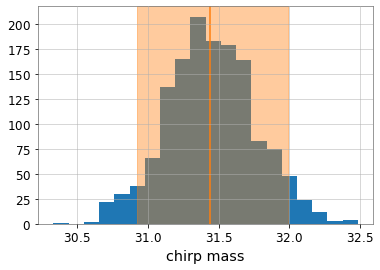

In [ ]:
fig, ax = plt.subplots()
ax.hist(result_short.posterior["chirp_mass"], bins=20)
ax.axvspan(lower_bound, upper_bound, color='C1', alpha=0.4)
ax.axvline(median, color='C1')
ax.set_xlabel("chirp mass")
plt.show()

/usr/local/lib/python3.7/dist-packages/gwpy/plot/axes.py:75: UserWarning: Attempting to set identical left == right == 0.08742274753486101 results in singular transformations; automatically expanding.
  return func(self, **kw)
/usr/local/lib/python3.7/dist-packages/corner/core.py:775: UserWarning: Attempting to set identical bottom == top == 0.08742274753486101 results in singular transformations; automatically expanding.
  return ax.set_ylim(new_ylim)
/usr/local/lib/python3.7/dist-packages/corner/core.py:775: UserWarning: Attempting to set identical bottom == top == 0.08742274753486101 results in singular transformations; automatically expanding.
  return ax.set_ylim(new_ylim)
/usr/local/lib/python3.7/dist-packages/corner/core.py:775: UserWarning: Attempting to set identical bottom == top == 0.08742274753486101 results in singular transformations; automatically expanding.
  return ax.set_ylim(new_ylim)
/usr/local/lib/python3.7/dist-packages/corner/core.py:775: UserWarning: Attempting 

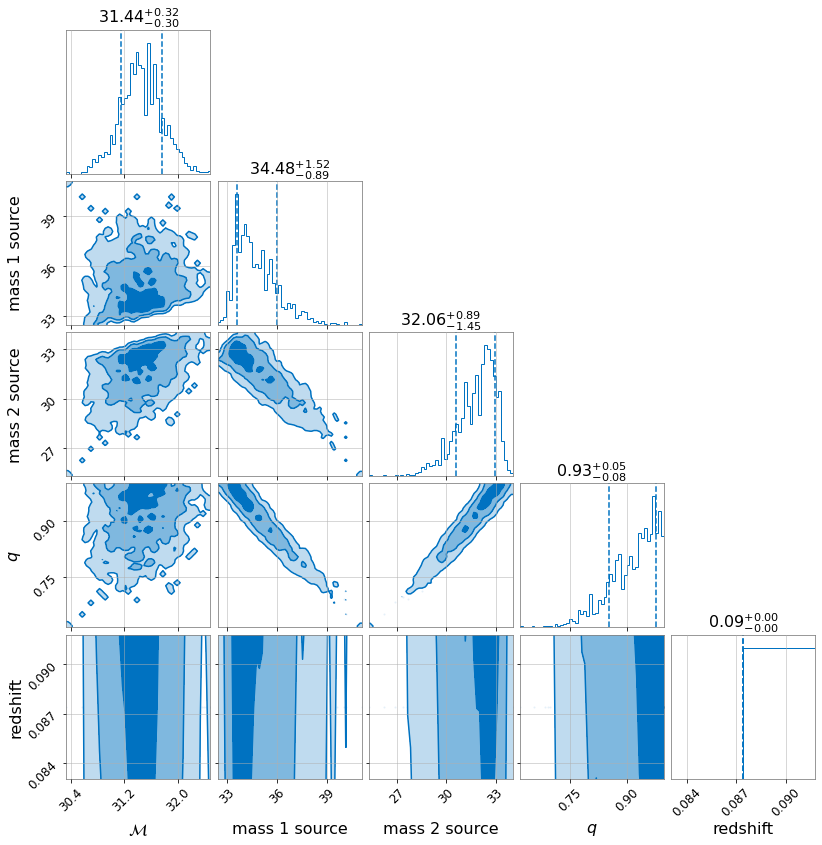

In [ ]:
result_short.plot_corner(parameters=["chirp_mass","mass_1_source","mass_2_source","mass_ratio","redshift"], prior=True)

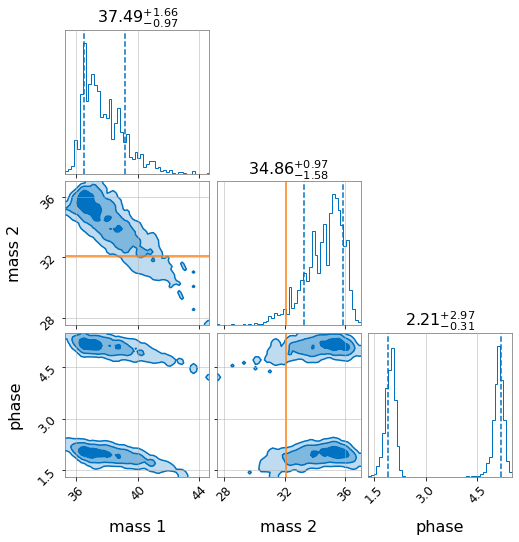

In [ ]:
parameters = dict(mass_1=34.48, mass_2=32.06, phase=0.09)
result_short.plot_corner(parameters)

In [ ]:
result_short.priors

{'a_1': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'a_2': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'chirp_mass': Uniform(minimum=30.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'dec': DeltaFunction(peak=-1.2232, name=None, latex_label=None, unit=None),
 'geocent_time': Uniform(minimum=1126259462.3000002, maximum=1126259462.5, name='geocent_time', latex_label='$t_c$', unit=None, boundary=None),
 'luminosity_distance': DeltaFunction(peak=412.066, name=None, latex_label=None, unit=None),
 'mass_ratio': Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None),
 'phase': Uniform(minimum=0, maximum=6.283185307179586, name='phase', latex_label='$\\phi$', unit=None, boundary=None),
 'phi_12': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'phi_jl': DeltaFunction(peak=0.0, name=None, latex_label=None, unit=None),
 'psi': DeltaFunction(peak=0.

In [ ]:
result_short.sampler_kwargs["nlive"]

500

In [ ]:
print("ln Bayes factor = {} +/- {}".format(
    result_short.log_bayes_factor, result_short.log_evidence_err))

ln Bayes factor = 268.08164694374375 +/- 0.12160796792282963
